<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics

In [2]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,-2.005073,-0.203547,0.617439
1,0.918295,-1.793795,-0.377744
2,-0.194145,-0.727529,-1.577537
3,-3.060258,-1.161201,0.262332
4,0.006766,0.574295,1.226167
...,...,...,...
49995,-0.308681,1.001630,0.471727
49996,-1.052966,-0.640556,0.236281
49997,0.291670,-0.442086,-0.792962
49998,-1.053921,0.456579,-1.811613


In [3]:
n=50
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                            'Xt2' : data_new['zt2'],
                            'Xt3' : data_new['zt3'],
                            'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                            'Xt2' : data_new['zt2'],
                            'Xt3' : data_new['zt3'],
                            'e'   : new_data['e']})
    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    table_data['e_hat']=table_data['Y']-table_data['Y_hat']
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3  ...          Y      Y_hat         e_hat
rep  index                                ...                                    
0.0  0.0   -0.920781  0.775377 -1.200653  ...   0.416787   0.472403 -5.561607e-02
     1.0   -0.927742 -1.915970  1.160981  ...   4.069575   4.934481 -8.649064e-01
     2.0    0.024565  0.018444 -2.330386  ...  -4.351897  -4.351896 -1.168108e-07
     3.0    0.269250  0.768119 -1.245741  ...   1.047058   0.775211  2.718470e-01
     4.0   -1.783111  0.672587 -0.142583  ...   3.960146   3.782336  1.778093e-01
...              ...       ...       ...  ...        ...        ...           ...
99.0 45.0  -1.544090  0.338769  0.884791  ...   7.077680   7.075765  1.914774e-03
     46.0   0.097212  1.801459 -2.185591  ...  -1.927225  -1.127055 -8.001700e-01
     47.0  -1.413559 -1.415439  1.012036  ...   8.047081   4.954747  3.092334e+00
     48.0  -0.572673  0.860969  2.111145  ...  12.879838  12.662508  2.173296e-01
     49.0  -0.011632 -1.103908 -0.077539  ...   4.025494   2.060346  1.965148e+00

[5000 rows x 7 columns]

In [4]:
table_data_all.mean()

Xt1      0.007411
Xt2      0.006143
Xt3     -0.005766
e        0.074232
Y        4.065654
Y_hat    3.991423
e_hat    0.074232
dtype: float64

In [5]:
table_data_all.var()

Xt1       1.014480
Xt2       0.999759
Xt3       0.989582
e        64.739026
Y        80.271161
Y_hat    15.007986
e_hat    64.739026
dtype: float64

In [6]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_all.corr()

,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
Xt1,1.000000,-0.003814,-0.006560,-0.036172,0.009223,0.096456,-0.036172
Xt2,-0.003814,1.000000,-0.019106,-0.002217,0.157602,0.369090,-0.002217
Xt3,-0.006560,-0.019106,1.000000,0.014093,0.408877,0.916337,0.014093
e,-0.036172,-0.002217,0.014093,1.000000,0.901691,0.008408,1.000000
Y,0.009223,0.157602,0.408877,0.901691,1.000000,0.439946,0.901691
Y_hat,0.096456,0.369090,0.916337,0.008408,0.439946,1.000000,0.008408
e_hat,-0.036172,-0.002217,0.014093,1.000000,0.901691,0.008408,1.000000


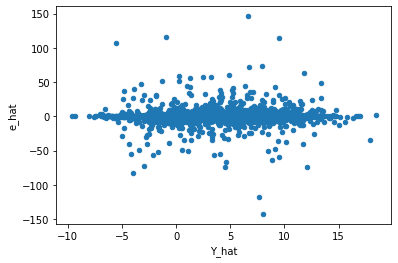

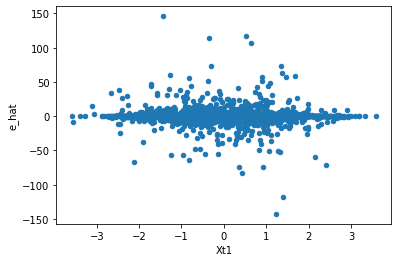

In [7]:
table_data_all.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt1', y='e_hat', kind = 'scatter')